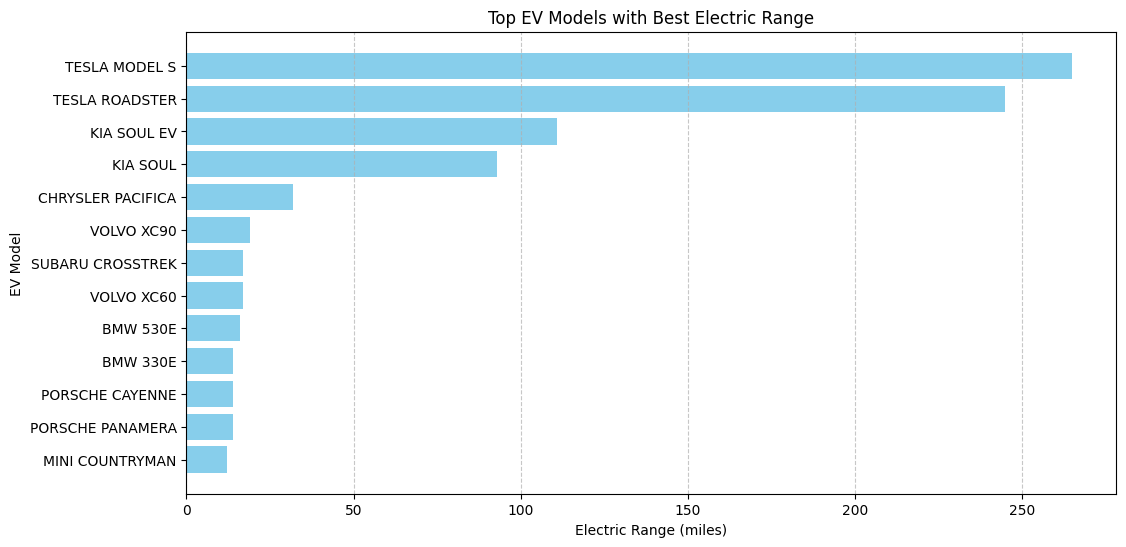

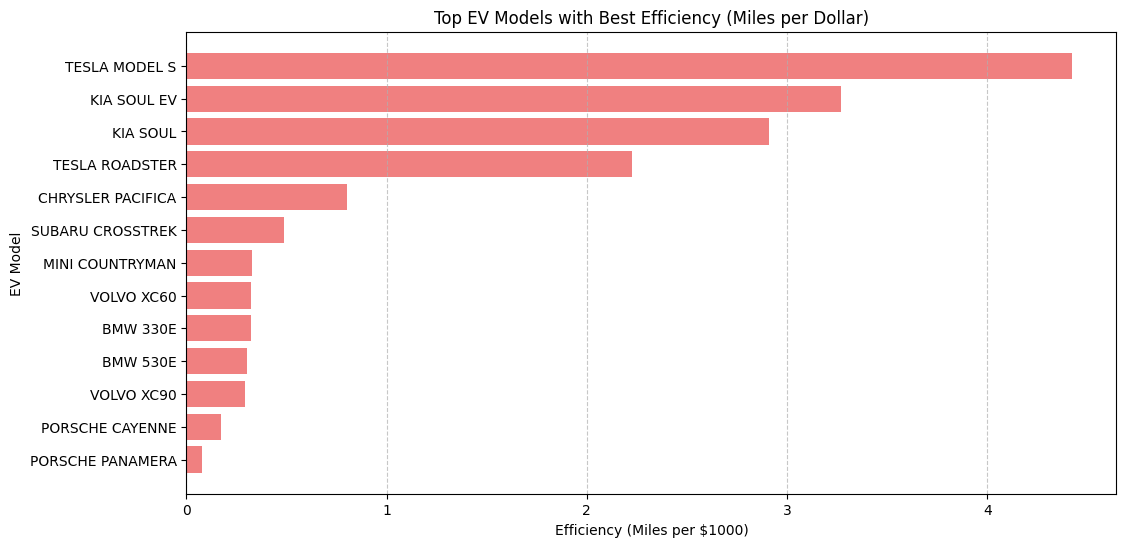

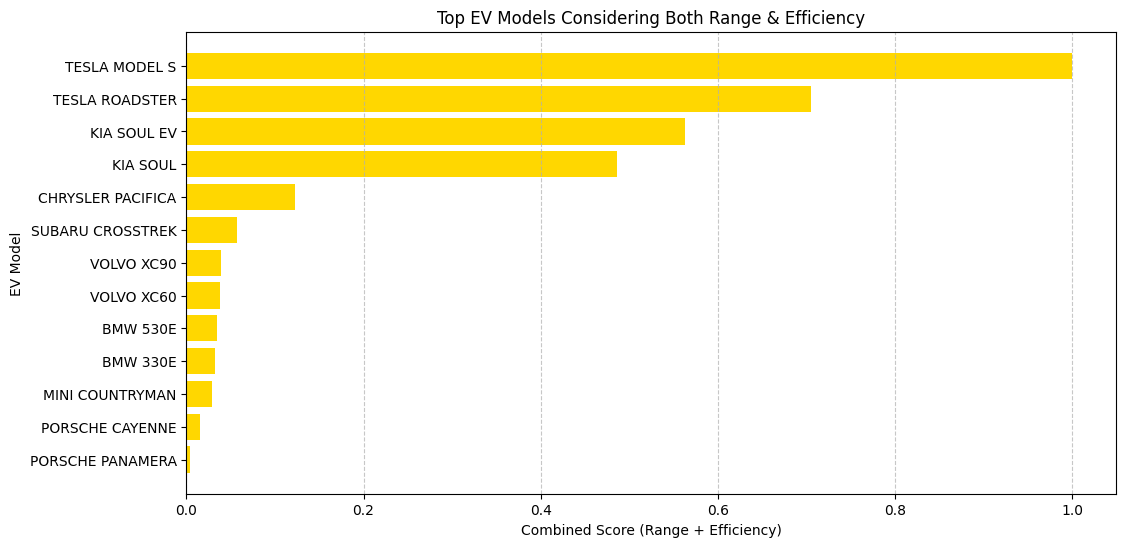

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load dataset
df = pd.read_csv('/content/Electric_Vehicle_Population_Data.csv')

# Select relevant columns and drop missing values
ev_data = df[['Make', 'Model', 'Electric Range', 'Base MSRP', 'Electric Vehicle Type']].dropna()

# Ensure Base MSRP is greater than zero to avoid division issues
ev_data = ev_data[ev_data['Base MSRP'] > 0]

# Compute efficiency: Electric Range per Dollar
ev_data['Efficiency (miles per $1000)'] = ev_data['Electric Range'] / (ev_data['Base MSRP'] / 1000)

# Get the top EV models with the best electric range
top_ev_range = ev_data.groupby(['Make', 'Model'])[['Electric Range']].max().reset_index()
top_ev_range = top_ev_range.sort_values(by='Electric Range', ascending=False).head(20)

# Get the top EV models with the best efficiency
top_ev_efficiency = ev_data.groupby(['Make', 'Model'])[['Efficiency (miles per $1000)']].max().reset_index()
top_ev_efficiency = top_ev_efficiency.sort_values(by='Efficiency (miles per $1000)', ascending=False).head(20)

# Normalize range and efficiency for a balanced comparison
scaler = MinMaxScaler()
ev_data[['Normalized Range', 'Normalized Efficiency']] = scaler.fit_transform(ev_data[['Electric Range', 'Efficiency (miles per $1000)']])

# Calculate combined score as an average of normalized range and efficiency
ev_data['Combined Score'] = (ev_data['Normalized Range'] + ev_data['Normalized Efficiency']) / 2

# Get top 20 EVs based on combined score
top_ev_combined = ev_data.groupby(['Make', 'Model'])[['Combined Score']].max().reset_index()
top_ev_combined = top_ev_combined.sort_values(by='Combined Score', ascending=False).head(20)

# 📊 Plot 1: Top EV Models by Electric Range
plt.figure(figsize=(12, 6))
plt.barh(top_ev_range['Make'] + ' ' + top_ev_range['Model'], top_ev_range['Electric Range'], color='skyblue')
plt.xlabel('Electric Range (miles)')
plt.ylabel('EV Model')
plt.title('Top EV Models with Best Electric Range')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot 2: Top EV Models by Efficiency
plt.figure(figsize=(12, 6))
plt.barh(top_ev_efficiency['Make'] + ' ' + top_ev_efficiency['Model'], top_ev_efficiency['Efficiency (miles per $1000)'], color='lightcoral')
plt.xlabel('Efficiency (Miles per $1000)')
plt.ylabel('EV Model')
plt.title('Top EV Models with Best Efficiency (Miles per Dollar)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# 📊 Plot 3: Best EV Models Considering Both Range & Efficiency
plt.figure(figsize=(12, 6))
plt.barh(top_ev_combined['Make'] + ' ' + top_ev_combined['Model'], top_ev_combined['Combined Score'], color='gold')
plt.xlabel('Combined Score (Range + Efficiency)')
plt.ylabel('EV Model')
plt.title('Top EV Models Considering Both Range & Efficiency')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()
